# LangGraph Demo: Crypto Price & World News Assistant


This is a beginner-level demo project using **LangGraph**, **LangChain**, and **Groq's LLaMA 3.1** model. It builds a simple agent that responds to user queries about:

- 🪙 Cryptocurrency prices (like Bitcoin)
- 🌍 Latest world news by country

The assistant intelligently uses real-time APIs and LangChain tools to respond based on user prompts.

---

## Install Required Packages

In [ ]:
!pip install langchain-core==0.3.13
!pip install langchain==0.2.16
!pip install langchain-huggingface==0.1.1
!pip install langgraph==0.2.68
!pip uninstall -y numpy transformers
!pip install --upgrade pip
!pip install numpy transformers
!pip install -qU langchain-groq

  Using cached langchain_core-0.3.13-py3-none-any.whl.metadata (6.3 kB)
Using cached langchain_core-0.3.13-py3-none-any.whl (408 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.2.43
    Uninstalling langchain-core-0.2.43:
      Successfully uninstalled langchain-core-0.2.43
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.2.16 requires langchain-core<0.3.0,>=0.2.38, but you have langchain-core 0.3.13 which is incompatible.
langchain-text-splitters 0.2.4 requires langchain-core<0.3.0,>=0.2.38, but you have langchain-core 0.3.13 which is incompatible.
  Using cached langchain_core-0.2.43-py3-none-any.whl.metadata (6.2 kB)
Using cached langchain_core-0.2.43-py3-none-any.whl (397 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [langchain-groq]


## Create and Configure the LLM

In [ ]:
# from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
# import os
# os.environ["HF_TOKEN"] = "your_actual_huggingface_api_key"
# os.environ["HUGGINGFACEHUB_API_TOKEN"] = "your_actual_huggingface_api_key"
# llm_model = HuggingFaceEndpoint(
#     repo_id="mistralai/Mistral-7B-Instruct-v0.2",
#     task="text-generation",
#     max_new_tokens=512,
#     do_sample=False,
#     repetition_penalty=1.03,
# )
# llm = ChatHuggingFace(llm=llm_model)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    api_key='replace_with_your_api_key'
)

## Basic LLM Response (without tools)

In [ ]:
from langchain_core.messages import (
    HumanMessage,
    SystemMessage,
)

messages = [
    SystemMessage(content="You're a helpful assistant"),
    HumanMessage(
        content="What is the bitcoin price now"
    ),
]

ai_msg = llm.invoke(messages)
print("ai_msg")
print(ai_msg)

ai_msg
content='I\'m not currently able to share real-time information. However, I can suggest some reliable sources where you can find the current Bitcoin price:\n\n1. **CoinMarketCap**: A popular website that provides real-time cryptocurrency prices, including Bitcoin.\n2. **CoinGecko**: Another reliable source for cryptocurrency prices, including Bitcoin.\n3. **Google Search**: You can simply type "Bitcoin price" in Google, and it will show you the current price based on various sources.\n4. **Cryptocurrency exchanges**: You can also check the prices on popular cryptocurrency exchanges like Binance, Kraken, or Coinbase.\n\nPlease note that cryptocurrency prices can fluctuate rapidly, so the price may change quickly.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 140, 'prompt_tokens': 46, 'total_tokens': 186, 'completion_time': 0.216187935, 'prompt_time': 0.002299406, 'queue_time': 0.21421453, 'total_time': 0.218487341}, 'model_name': 'llama-3.1-8b-inst

***Note: LLM replies it cannot access real-time data. So we want to define tools and give access to llm.***


## Define Real-World Tools

In [ ]:
import requests
def getBitcoinPrice(crypto_code:str) -> dict:
  """ Fetches the latest crypto price. Use the crypto currency name.
  Eg:
  bitcoin for Bitcoin
  ethereum for Ethereum
  """
  url = f"https://api.coingecko.com/api/v3/simple/price?ids={crypto_code}&vs_currencies=usd"
  response = requests.get(url)
  return response.json()


def getWorldNews(country_code:str)->list:
  """
  Fetches the latest news in a coutry from the specified country code
  Eg:
  in for india
  us for America
  pk for pakistan
  jp for jappan
  """
  news_headlines = []
  api_key = "9051e47fb2366378724e1230d"
  url = f"https://gnews.io/api/v4/top-headlines?country={country_code}&token={api_key}"
  response = requests.get(url)
  for eachObject in response.json()['articles']:
    news_headlines.append(eachObject['title'])
  return news_headlines


## Bind Tools to LLM

In [ ]:
tools = [getBitcoinPrice,getWorldNews]
llm_with_tools = llm.bind_tools(tools)

## Create the Agent

In [ ]:
from langgraph.prebuilt import create_react_agent
graph = create_react_agent(llm_with_tools, tools=tools)

## Visualize the Agent

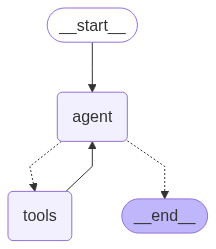

In [ ]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

## Pulling ReAct Prompt from LangChain Hub

***This ReAct-style prompt guides the agent to reason through steps, decide whether to call a tool, and respond accordingly.***

In [ ]:
from langchain import hub
prompt = hub.pull("hwchase17/react")
prompt.pretty_print()

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


## Running the Agent with Streaming Output

Define a utility function to print each streamed step in the interaction:

In [ ]:
from langchain_core.messages import ToolMessage
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()
        # if type(message)==ToolMessage:
        #   break

Set up your initial user inputs:

In [ ]:
inputs = {
    "messages": [
        {"role": "user", "content": "You are good at cryptocurrency and world news"},
        {"role": "assistant", "content": "Ask me any cryptocurrency or real world news related question, I will answer it using provided tools"},
        {"role": "user", "content": "Generate a prpper document about the bitcoin price now"}
        #{"role": "user", "content": "Generate a document about current situations in india"}
    ]
}


Run the agent and stream its response:

In [ ]:
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Generate a prpper document about the bitcoin price now
================================== Ai Message ==================================
Tool Calls:
  getBitcoinPrice (ysx3qyj72)
 Call ID: ysx3qyj72
  Args:
    crypto_code: bitcoin
================================= Tool Message =================================
Name: getBitcoinPrice

{"bitcoin": {"usd": 105547}}
================================== Ai Message ==================================

**Bitcoin Price Report**

**Current Price:** $105,547
**Currency:** USD
**Crypto Code:** bitcoin

Please note that the price may fluctuate rapidly and this report is only a snapshot of the current price at the time of generation.


## Next Steps

Add more tools (e.g., weather, sports scores, stock data)

Add memory for multi-turn conversation

Deploy this as a web app using Streamlit or Flask

In [1]:
# Just a small change to refresh metadata